<a href="https://colab.research.google.com/github/girisoura/automatic-octo-robot/blob/main/Learner_Notebook_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tesla (TSLA) Stock Price prediction using Facebook Prophet

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [1]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [2]:
 #Initializing Plotly
 import plotly.io as pio
 pio.renderers.default

'colab'

## Importing the Dataset & Exploring it

In [6]:
df=pd.read_csv("TSLA.csv")

In [4]:
#read_csv function from pandas

In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,93.900002,98.973999,88.433998,89.014000,89.014000,102447500
1,2020-03-17,88.001999,94.370003,79.199997,86.040001,86.040001,119973000
2,2020-03-18,77.800003,80.972000,70.101997,72.244003,72.244003,118931000
3,2020-03-19,74.940002,90.400002,71.692001,85.528000,85.528000,150977500
4,2020-03-20,87.639999,95.400002,85.157997,85.505997,85.505997,141427500
...,...,...,...,...,...,...,...
246,2021-03-08,600.549988,620.130005,558.789978,563.000000,563.000000,51787000
247,2021-03-09,608.179993,678.090027,595.210022,673.580017,673.580017,67523300
248,2021-03-10,700.299988,717.849976,655.059998,668.059998,668.059998,60605700
249,2021-03-11,699.400024,702.500000,677.179993,699.599976,699.599976,36253900


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,414.739109,425.323268,402.764717,415.137952,415.137952,6.178552e+07
std,234.908560,239.374833,229.101662,234.987820,234.987820,3.306128e+07
min,74.940002,80.972000,70.101997,72.244003,72.244003,1.515770e+07
25%,194.901001,199.384003,188.566994,193.368995,193.368995,3.628290e+07
50%,408.951996,418.700012,401.660004,408.500000,408.500000,5.561600e+07
75%,606.549988,627.795013,586.750000,607.234985,607.234985,8.131825e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,2.221262e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [10]:
px.area(df,x='Date',y='Close')

In [11]:
px.line(df,x='Date',y='Close')

In [12]:
px.area(df,x='Date',y='Volume')

In [13]:
px.bar(df,y='Volume')

In [14]:
px.box(df,y="Close")

# Understanding Facebook Prophet

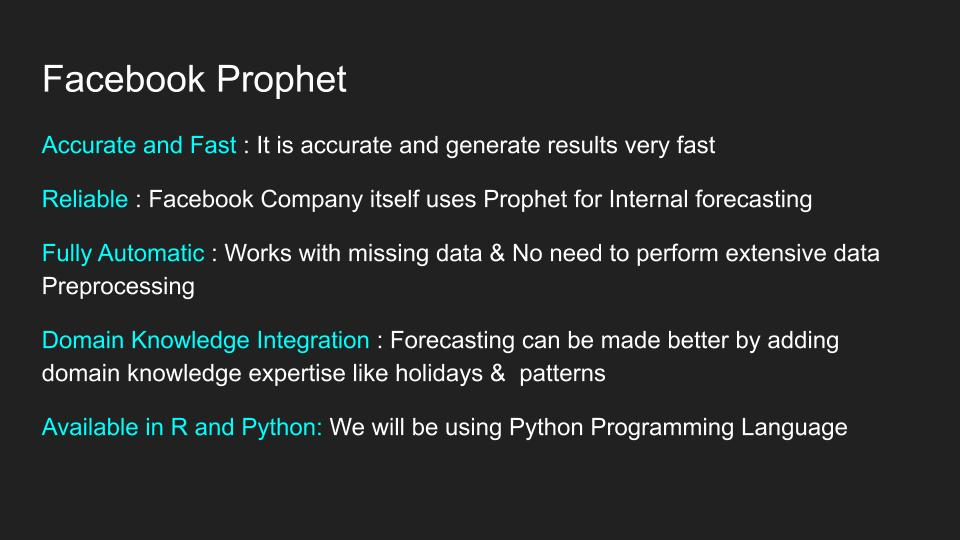

## Data Preperation

In [15]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,93.900002,98.973999,88.433998,89.014000,89.014000,102447500
1,2020-03-17,88.001999,94.370003,79.199997,86.040001,86.040001,119973000
2,2020-03-18,77.800003,80.972000,70.101997,72.244003,72.244003,118931000
3,2020-03-19,74.940002,90.400002,71.692001,85.528000,85.528000,150977500
4,2020-03-20,87.639999,95.400002,85.157997,85.505997,85.505997,141427500
...,...,...,...,...,...,...,...
246,2021-03-08,600.549988,620.130005,558.789978,563.000000,563.000000,51787000
247,2021-03-09,608.179993,678.090027,595.210022,673.580017,673.580017,67523300
248,2021-03-10,700.299988,717.849976,655.059998,668.059998,668.059998,60605700
249,2021-03-11,699.400024,702.500000,677.179993,699.599976,699.599976,36253900


In [16]:
  columns=['Date','Close']
  ndf=pd.DataFrame(df,columns=columns)

In [17]:
ndf

,Date,Close
0,2020-03-16,89.014000
1,2020-03-17,86.040001
2,2020-03-18,72.244003
3,2020-03-19,85.528000
4,2020-03-20,85.505997
...,...,...
246,2021-03-08,563.000000
247,2021-03-09,673.580017
248,2021-03-10,668.059998
249,2021-03-11,699.599976


In [18]:
prophet_df=ndf.rename(columns={'Date':'ds','Close':'y'})

In [19]:
prophet_df

,ds,y
0,2020-03-16,89.014000
1,2020-03-17,86.040001
2,2020-03-18,72.244003
3,2020-03-19,85.528000
4,2020-03-20,85.505997
...,...,...
246,2021-03-08,563.000000
247,2021-03-09,673.580017
248,2021-03-10,668.059998
249,2021-03-11,699.599976


## Creating Facebook Prophet Model

In [20]:
m=Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphbdyuk43/l6vxa6ds.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphbdyuk43/z3o40onp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37899', 'data', 'file=/tmp/tmphbdyuk43/l6vxa6ds.json', 'init=/tmp/tmphbdyuk43/z3o40onp.json', 'output', 'file=/tmp/tmphbdyuk43/prophet_model3s5bv62l/prophet_model-20230626075705.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:57:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:57:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [23]:
future=m.make_future_dataframe(periods=30)
forecast=m.predict(future)

In [24]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-16,65.599460,-24.062894,138.570904,65.599460,65.599460,-5.864685,-5.864685,-5.864685,-5.864685,-5.864685,-5.864685,0.0,0.0,0.0,59.734775
1,2020-03-17,67.394950,-27.720413,146.607004,67.394950,67.394950,-2.383380,-2.383380,-2.383380,-2.383380,-2.383380,-2.383380,0.0,0.0,0.0,65.011571
2,2020-03-18,69.190441,-21.976097,154.895521,69.190441,69.190441,-3.494360,-3.494360,-3.494360,-3.494360,-3.494360,-3.494360,0.0,0.0,0.0,65.696081
3,2020-03-19,70.985932,-17.531074,153.385887,70.985932,70.985932,-3.843579,-3.843579,-3.843579,-3.843579,-3.843579,-3.843579,0.0,0.0,0.0,67.142353
4,2020-03-20,72.781423,-14.189716,146.651335,72.781423,72.781423,-7.762547,-7.762547,-7.762547,-7.762547,-7.762547,-7.762547,0.0,0.0,0.0,65.018876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2021-04-07,900.291503,805.426192,975.747341,899.194394,901.476458,-3.494360,-3.494360,-3.494360,-3.494360,-3.494360,-3.494360,0.0,0.0,0.0,896.797143
277,2021-04-08,902.748588,818.296757,980.049540,901.577602,903.993551,-3.843579,-3.843579,-3.843579,-3.843579,-3.843579,-3.843579,0.0,0.0,0.0,898.905009
278,2021-04-09,905.205673,811.582242,986.449230,903.961994,906.509924,-7.762547,-7.762547,-7.762547,-7.762547,-7.762547,-7.762547,0.0,0.0,0.0,897.443127
279,2021-04-10,907.662758,837.046436,1009.505046,906.346629,909.079029,11.674274,11.674274,11.674274,11.674274,11.674274,11.674274,0.0,0.0,0.0,919.337033


In [25]:
px.line(forecast,x='ds',y='yhat')

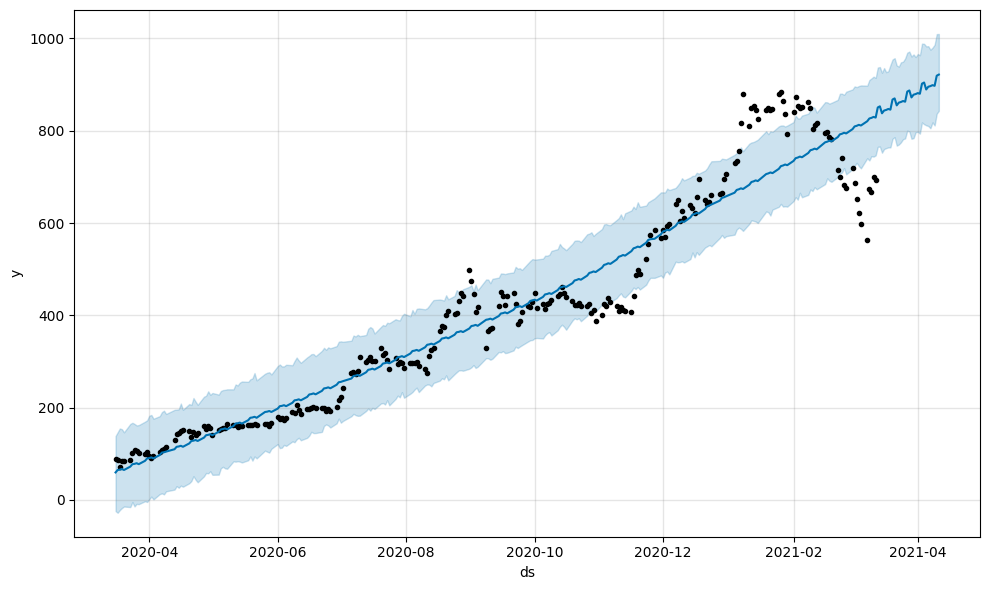

In [26]:
figure=m.plot(forecast,xlabel='ds',ylabel='y')

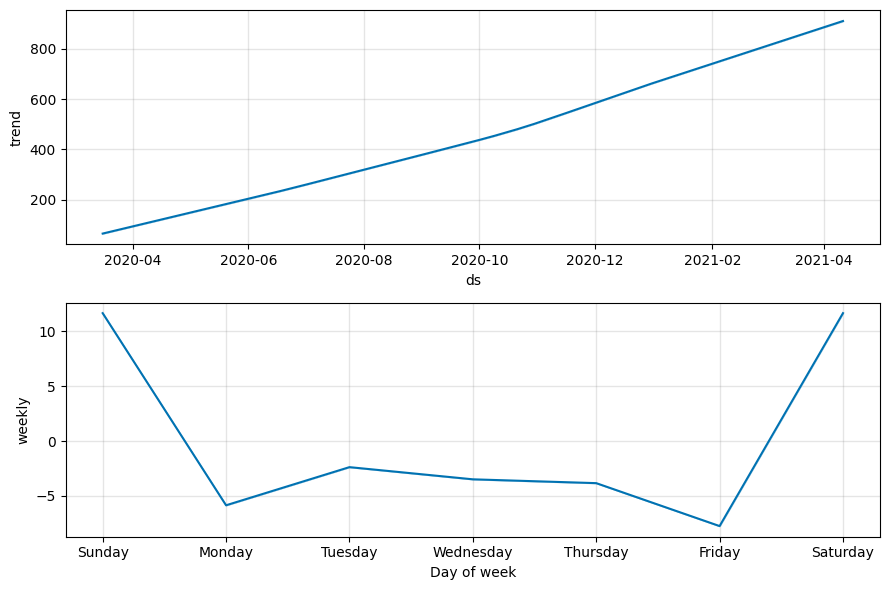

In [28]:
figure2=m.plot_components(forecast)

##Downloading the Forecast data

In [29]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>